In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

df = pd.read_csv("Meteorite_Landings.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
name           45716 non-null object
id             45716 non-null int64
nametype       45716 non-null object
recclass       45716 non-null object
mass           45585 non-null float64
fall           45716 non-null object
year           45428 non-null float64
reclat         38401 non-null float64
reclong        38401 non-null float64
GeoLocation    38401 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [84]:
 df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [12]:
df2 = df.dropna(subset=["mass","year"])
df2 = df2[df2["mass"]>0]
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45292 entries, 0 to 45715
Data columns (total 10 columns):
name           45292 non-null object
id             45292 non-null int64
nametype       45292 non-null object
recclass       45292 non-null object
mass           45292 non-null float64
fall           45292 non-null object
year           45292 non-null float64
reclat         38097 non-null float64
reclong        38097 non-null float64
GeoLocation    38097 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


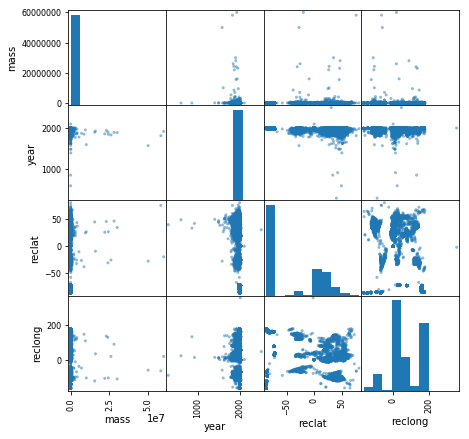

In [17]:
pd.plotting.scatter_matrix(df[["mass","year","reclat","reclong"]],figsize=(7,7));


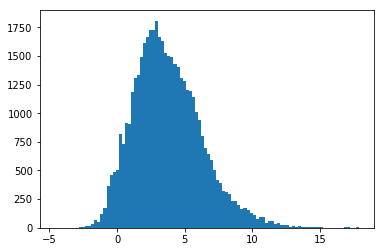

In [20]:
year = df2["year"]
mass = df2["mass"]
log_mass = np.log(mass)
plt.hist(log_mass,bins=100);

(1980, 2020)

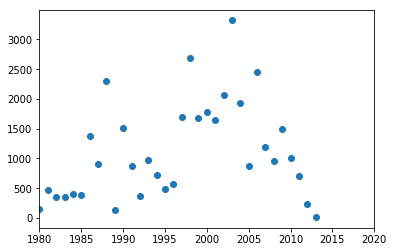

In [21]:
counts = year.value_counts()
plt.scatter(counts.index,counts)
plt.xlim(1980,2020)

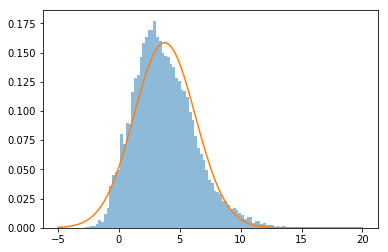

In [26]:
from scipy.stats import norm,skewnorm,lognorm
ms = np.linspace(-5,20,100)

mean, std = log_mass.mean(),np.std(log_mass)
pdf_norm = norm.pdf(ms,mean,std)
plt.hist(log_mass,bins=100,density=True,alpha=0.5)
plt.plot(ms, pdf_norm);

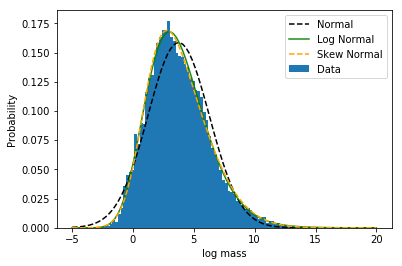

In [40]:
p_lognorm= lognorm.fit(log_mass)
pdf_lognorm = lognorm.pdf(ms,*p_lognorm)

p_skewnorm= skewnorm.fit(log_mass)
pdf_skewnorm = skewnorm.pdf(ms,*p_skewnorm)

plt.hist(log_mass,bins=100,density=True,label="Data")
plt.plot(ms, pdf_norm,ls="--",color="black",label="Normal")
plt.plot(ms, pdf_lognorm,ls="-",alpha=0.9,color="green",label="Log Normal")
plt.plot(ms, pdf_skewnorm,ls="--",color="orange",label="Skew Normal")
plt.xlabel("log mass")
plt.ylabel("Probability")
plt.legend();

In [91]:
mass_of_doom = np.log((4/3)* np.pi * 500**3 * 1600 * 1410)
mass_of_doom

34.705340145167845

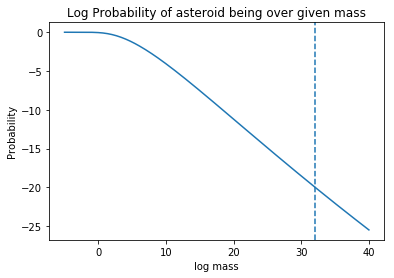

In [45]:
ms2 = np.linspace(-5,40,200)

plt.plot(ms2, lognorm.logsf(ms2,*p_lognorm))
plt.axvline(mass_of_doom,ls="--")
plt.xlabel("log mass")
plt.ylabel("Probability")
plt.title("Log Probability of asteroid being over given mass");

In [93]:
prob_small_mass = lognorm.logcdf(mass_of_doom, *p_lognorm)
frac_sky_monitored = 0.1
num_years = 1000
num_events = num_years * counts.max() / frac_sky_monitored
prob_bad = 1 - np.exp(num_events * prob_small_mass)
print(f"Prob a >1km asteroid impacts with {num_years} years is {prob_bad * 100:.2f}%")

Prob a >1km asteroid impacts with 1000 years is 1.06%
